### Here we compare the proportion of low-credibility sources shared, relative to all sources shared, for the top users identified via the FIB-index and Influence metrics.

In [1]:
import sys
sys.path.insert(0, '../src_clean')
import glob
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
from scipy import stats
from scipy.stats import mannwhitneyu

from utils import mean_diff_bootstrap_ci, cohen_d


### This loads the proportion of tweets sent by a user that were low credibility

In [2]:

author_low_cred = pd.read_csv("../data/top_fib_inf_mean_prop_tweets_are_low_cred.csv")
author_low_cred

,author_id,user_type,is_low_cred
0,1000141948269678592,both,0.034608
1,101779040,influential,0.006009
2,1018425398869282817,both,0.342995
3,1036239330984054784,fiber,0.104710
4,1037648264672079872,influential,0.010982
...,...,...,...
118,921880207870459904,fiber,0.246560
119,92928883,fiber,0.020007
120,94120026,fiber,0.016102
121,954124423,influential,0.010480


### Create two separate frames for the influentials and the fibers. We include the users who are both an influential and a fiber in both of these frames!

In [3]:
inf_frame = author_low_cred.loc[(author_low_cred["user_type"] == "influential") | (author_low_cred["user_type"] == "both"),:].copy()
fib_frame = author_low_cred.loc[(author_low_cred["user_type"] == "fiber") | (author_low_cred["user_type"] == "both"),:].copy()

In [4]:
inf_frame.head()

,author_id,user_type,is_low_cred
0,1000141948269678592,both,0.034608
1,101779040,influential,0.006009
2,1018425398869282817,both,0.342995
4,1037648264672079872,influential,0.010982
5,1043185714437992449,influential,0.000489


In [5]:
fib_frame.head()

,author_id,user_type,is_low_cred
0,1000141948269678592,both,0.034608
2,1018425398869282817,both,0.342995
3,1036239330984054784,fiber,0.104710
6,1071493866489044993,fiber,0.033240
7,1088817055602757633,fiber,0.001420


### Now we fix the user type names

In [6]:
inf_frame.loc[:, "user_type"] = "Influence"
fib_frame.loc[:, "user_type"] = "FIB-index"

In [7]:
inf_frame.head()


,author_id,user_type,is_low_cred
0,1000141948269678592,Influence,0.034608
1,101779040,Influence,0.006009
2,1018425398869282817,Influence,0.342995
4,1037648264672079872,Influence,0.010982
5,1043185714437992449,Influence,0.000489


In [8]:
fib_frame.head()

,author_id,user_type,is_low_cred
0,1000141948269678592,FIB-index,0.034608
2,1018425398869282817,FIB-index,0.342995
3,1036239330984054784,FIB-index,0.104710
6,1071493866489044993,FIB-index,0.033240
7,1088817055602757633,FIB-index,0.001420


In [9]:
len(inf_frame["author_id"].unique())

91

In [10]:
len(fib_frame["author_id"].unique())

84

In [11]:
print("Mann Whitney U")
print("-" * 20)

statistic, p = stats.mannwhitneyu(
    inf_frame["is_low_cred"],
    fib_frame["is_low_cred"],
)
print(f"\t- Statistic : {statistic}")
print(f"\t- pvalue    : {p}")

Mann Whitney U
--------------------
	- Statistic : 2783.5
	- pvalue    : 0.0019341235605159842


### Now we combine these two frames.

In [12]:
user_low_cred_sharing_combined = pd.concat([inf_frame, fib_frame])

In [13]:
user_low_cred_sharing_combined.author_id

0      1000141948269678592
1                101779040
2      1018425398869282817
4      1037648264672079872
5      1043185714437992449
              ...         
115              878916812
116     895286614431346688
118     921880207870459904
119               92928883
120               94120026
Name: author_id, Length: 175, dtype: int64

In [14]:
user_low_cred_sharing_combined

,author_id,user_type,is_low_cred
0,1000141948269678592,Influence,0.034608
1,101779040,Influence,0.006009
2,1018425398869282817,Influence,0.342995
4,1037648264672079872,Influence,0.010982
5,1043185714437992449,Influence,0.000489
...,...,...,...
115,878916812,FIB-index,0.043129
116,895286614431346688,FIB-index,0.021170
118,921880207870459904,FIB-index,0.246560
119,92928883,FIB-index,0.020007


In [15]:
user_low_cred_sharing_combined.user_type = user_low_cred_sharing_combined.user_type.map({
    "Influence" : "Influence",
    "FIB-index" : "h-index"
})

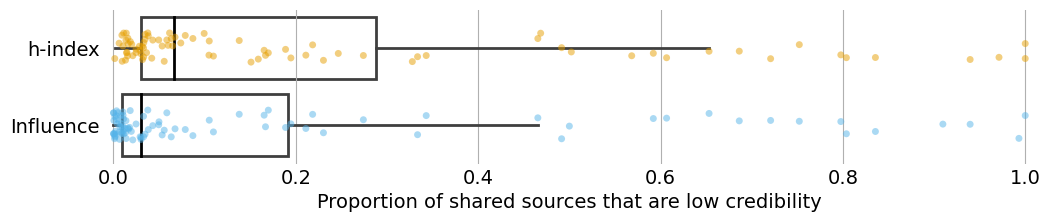

In [16]:
mpl.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(12,2))

# Add points
sns.stripplot(
    x="is_low_cred",
    y="user_type",
    data=user_low_cred_sharing_combined,
    order=['h-index', "Influence"],
    hue='user_type',
    palette={'h-index':'#E69F00', "Influence":'#56B4E9'},
    alpha=.5,
    jitter=.2,
    ax = ax,
    legend=None,
)

# Add boxes
sns.boxplot(
    x="is_low_cred",
    y="user_type",
    data=user_low_cred_sharing_combined,
    order=['h-index', "Influence"],
    fliersize=0,
    ax = ax,
    boxprops = {'facecolor':"none", 'linewidth':2},
    whiskerprops = {'linewidth':2},
    medianprops={"color": "k", "linewidth": 2},
    showcaps=False
    
)

# Remove border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add vertical grid lines
ax.grid(axis='x')

# Control xlim to provide space for points at edges
ax.set_xlim(-0.01,1.01)

# Unnecessary ticks
ax.tick_params(size=0)

# Set labels
ax.set_ylabel(None)
ax.set_xlabel("Proportion of shared sources that are low credibility")


fig.savefig(
    "../figures/misinfo-sharing-behaviors.pdf",
    bbox_inches='tight',
    dpi=600
)

In [17]:
inf_prop_misinfo_shared = list(user_low_cred_sharing_combined.loc[
    user_low_cred_sharing_combined["user_type"] == "Influence",
    "is_low_cred"
])

fib_prop_misinfo_shared = list(user_low_cred_sharing_combined.loc[
    user_low_cred_sharing_combined["user_type"] == "h-index",
    "is_low_cred"
])

In [18]:
mannwhitneyu(fib_frame.is_low_cred, inf_frame.is_low_cred)

MannwhitneyuResult(statistic=4860.5, pvalue=0.0019341235605159842)

In [19]:
print("Influence:")
print(f"Mean: {np.mean(inf_prop_misinfo_shared):.2f}")
print(f"Median: {np.median(inf_prop_misinfo_shared):.2f}")

print("\nFIB:")
print(f"Mean: {np.mean(fib_prop_misinfo_shared):.2f}")
print(f"Median: {np.median(fib_prop_misinfo_shared):.2f}")



Influence:
Mean: 0.17
Median: 0.03

FIB:
Mean: 0.22
Median: 0.07


In [20]:
fib_frame.is_low_cred.mean()

0.21853811589443742

In [21]:
inf_frame.is_low_cred.mean()

0.1738708523630669

In [22]:
fib_frame.is_low_cred.median()

0.0662040994625332

In [23]:
inf_frame.is_low_cred.median()

0.0302491103202846

In [24]:
ci = mean_diff_bootstrap_ci(
    np.array(fib_frame.is_low_cred),
    np.array(inf_frame.is_low_cred),
    n_samples = 1000,
    d_only=False,
)
cohens = cohen_d(np.array(fib_frame.is_low_cred), inf_frame.is_low_cred)

print(f"\t- CI (95%; 5k samples) : {np.round(ci,2)}")
print(f"\t- Cohen's d            : {np.round(cohens,2)}\n")

	- CI (95%; 5k samples) : [-0.04  0.13]
	- Cohen's d            : 0.16

